In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
X, y = make_classification(n_samples=500)

In [7]:
X[0]

array([ 1.09608641,  0.84506956, -0.43561291,  1.32713217, -0.69800884,
        1.2794999 ,  0.39089584, -1.65514964,  2.47440124, -2.36859622,
       -0.16544914, -2.47005676, -0.22784309,  1.53506954,  3.39241372,
        0.73975957,  0.70296979,  0.10311727,  2.13026164,  1.2908583 ])

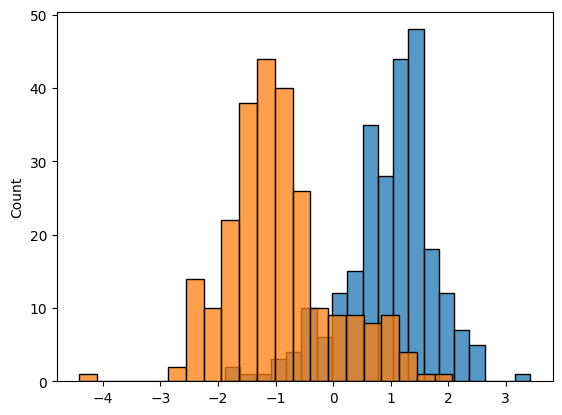

In [13]:
sns.histplot(X[y==0,11])
sns.histplot(X[y==1,11])
plt.show()

In [14]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, random_state=34, train_size=0.7)

In [25]:
dt = DecisionTreeClassifier(criterion="entropy")

In [26]:
model = AdaBoostClassifier(estimator=dt, n_estimators=150)

In [27]:
model.fit(X_tr, y_tr)

AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy'),
                   n_estimators=150)

In [28]:
model.score(X_tr, y_tr)

1.0

In [29]:
y_pr = model.predict(X_te)

In [30]:
accuracy_score(y_te, y_pr)

0.9133333333333333

In [31]:
confusion_matrix(y_te, y_pr)

array([[70,  9],
       [ 4, 67]], dtype=int64)

In [32]:
print(classification_report(y_te, y_pr))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92        79
           1       0.88      0.94      0.91        71

    accuracy                           0.91       150
   macro avg       0.91      0.91      0.91       150
weighted avg       0.92      0.91      0.91       150



In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
lr = LogisticRegression()

In [35]:
model2 = AdaBoostClassifier(n_estimators=150, estimator=lr)

In [36]:
model2.fit(X_tr, y_tr)

AdaBoostClassifier(estimator=LogisticRegression(), n_estimators=150)

In [37]:
model2.score(X_tr, y_tr)

0.8942857142857142

In [38]:
y_pr2 = model2.predict(X_te)

In [39]:
accuracy_score(y_te, y_pr2)

0.84

In [40]:
confusion_matrix(y_te, y_pr2)

array([[66, 13],
       [11, 60]], dtype=int64)

In [42]:
print(classification_report(y_te, y_pr2))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85        79
           1       0.82      0.85      0.83        71

    accuracy                           0.84       150
   macro avg       0.84      0.84      0.84       150
weighted avg       0.84      0.84      0.84       150



In [ ]:
------------------------------------------------------------------------

In [51]:
import joblib
import pickle

In [52]:
joblib.dump(model, "AdaBoost Classifier")

['AdaBoost Classifier']

In [53]:
m1 = joblib.load("AdaBoost Classifier")

In [56]:
m1.predict(X_te)

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0])

In [57]:
with open("AdaBoost Pickle.pkl", mode="wb") as file:
    pickle.dump(model2, file)

In [58]:
with open("AdaBoost Pickle.pkl", mode="rb") as file:
    m2=pickle.load(file)

In [59]:
m2.predict(X_te)

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0])